In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline


In [40]:
shots_df = pd.read_csv('data/19_20_shot_quality.csv')
season_df = pd.read_excel('data/19_20_SEASON_STATS.xlsx')

In [41]:
merged = pd.merge(shots_df,season_df, on="Team")
merged.sort_values(by=['Team'], inplace=True)

In [42]:
merged.columns

Index(['Team', 'aboveFor', 'belowFor', 'aboveAgainst', 'belowAgainst',
       'abovePercent', 'belowPercent', 'forPercent', 'againstPercent', 'Rk',
       'Team_name', 'AvAge', 'GP', 'W', 'L', 'OL', 'PTS', 'PTS%', 'GF', 'GA',
       'SOW', 'SOL', 'SRS', 'SOS', 'TG/G', 'EVGF', 'EVGA', 'PP', 'PPO', 'PP%',
       'PPA', 'PPOA', 'PK%', 'SH', 'SHA', 'PIM/G', 'oPIM/G', 'S', 'S%', 'SA',
       'SV%', 'SO'],
      dtype='object')

In [69]:
x = merged['PTS']
y_abp = merged['abovePercent']
m_abp, b_abp = np.polyfit(x,y_abp,1)
y_pred_abp = m_abp*x+b_abp
r2_abp = round(r2_score(y_abp,y_pred),2)

In [71]:
x = merged['PTS']
y_bep = merged['belowPercent']
m_bep, b_bep = np.polyfit(x,y_bep,1)
y_pred_bep = m_bep*x+b_bep
r2_bep = round(r2_score(y_bep,y_pred),2)

Text(0.5, 1.0, 'R2 score = 0.0')

<Figure size 2880x2880 with 0 Axes>

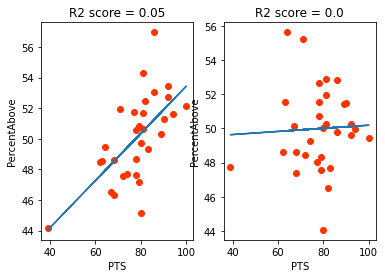

In [72]:
fig = plt.figure(figsize=(40,40))
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(x,y_abp,c="#ff3300")
ax1.plot(x,y_pred_abp)
ax1.set_xlabel("PTS")
ax1.set_ylabel("PercentAbove")
ax1.set_title(f"R2 score = {r2_abp}")

ax2.scatter(x,y_bep,c="#ff3300")
ax2.plot(x,y_pred_bep)
ax2.set_xlabel("PTS")
ax2.set_ylabel("PercentAbove")
ax2.set_title(f"R2 score = {r2_bep}")

In [62]:
fig.savefig("data/image_one.png")